In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import h5py

#CPU Only
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
#GPU
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
#labels
labels = ['OK', 'failed']

#load model
#model = load_model('model_1a_orig.h5')
#model = load_model('model_1a_scaled_255.h5')
model = load_model('model_1a_grey.h5')

In [ ]:
#code to process new images
img = Image.open(r'C:\Users\hartw\GitHub\3DPrintCheck\dataset_1\1_failed_0.jpg')
img = np.asarray(img)
print(type(img))
print(img.shape)
img = np.expand_dims(img, axis=0)
print(type(img))
print(img.shape)

In [ ]:
#prediction using model
predict = model.predict(img)
print(predict[0])
print(labels[np.argmax(predict[0])])

In [3]:
#load datasets back into arrays
#dataset_1 = h5py.File('./dataset_1_orig.hdf5', 'r')
#dataset_1 = h5py.File('./dataset_1_scaled_255.hdf5', 'r')
dataset_1 = h5py.File('./dataset_1_grey.hdf5', 'r')
X = dataset_1.get('X')
X = np.array(X)
y = dataset_1.get('y')
y = np.array(y)
print(X.shape)
print(y.shape)
dataset_1.close()

(476, 480, 640, 1)
(476, 2)


In [4]:
#confusion matrix
y_pred = []
y_true = []

#prediction using model
predict = model.predict([X])

for i in range(len(X)):
    pred_label = labels[np.argmax(predict[i])]
    y_pred.append(pred_label)
for i in range(len(X)):
    true_label = labels[np.argmax(y[i])]
    y_true.append(true_label)

confusion_matrix(y_true, y_pred, labels=labels)

array([[170,  30],
       [ 11, 265]], dtype=int64)

Wrong Prediction Number: 1
Image Number: 0
True Label: OK
Predict Label: failed


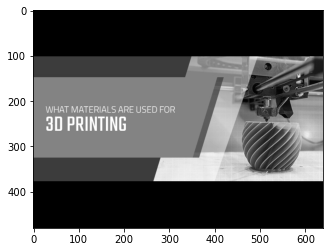

Wrong Prediction Number: 2
Image Number: 9
True Label: OK
Predict Label: failed


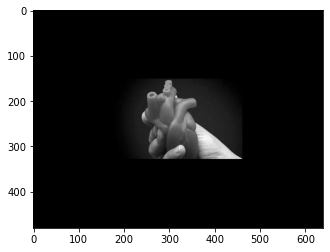

Wrong Prediction Number: 3
Image Number: 11
True Label: OK
Predict Label: failed


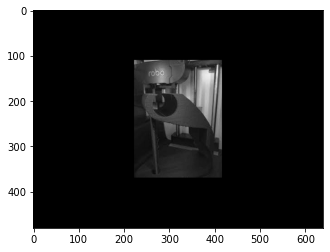

Wrong Prediction Number: 4
Image Number: 15
True Label: OK
Predict Label: failed


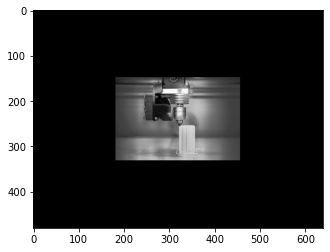

Wrong Prediction Number: 5
Image Number: 18
True Label: OK
Predict Label: failed


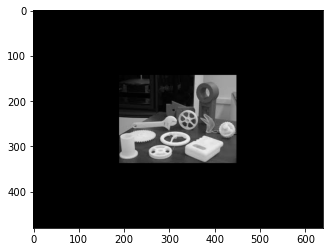

Wrong Prediction Number: 6
Image Number: 19
True Label: OK
Predict Label: failed


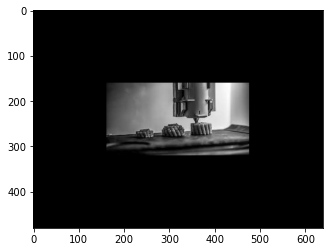

Wrong Prediction Number: 7
Image Number: 25
True Label: OK
Predict Label: failed


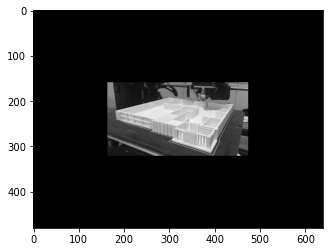

Wrong Prediction Number: 8
Image Number: 30
True Label: OK
Predict Label: failed


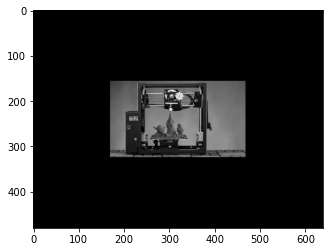

Wrong Prediction Number: 9
Image Number: 31
True Label: OK
Predict Label: failed


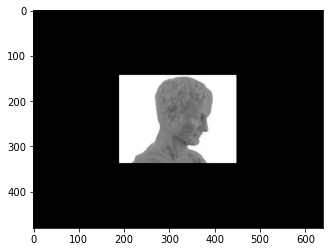

Wrong Prediction Number: 10
Image Number: 33
True Label: OK
Predict Label: failed


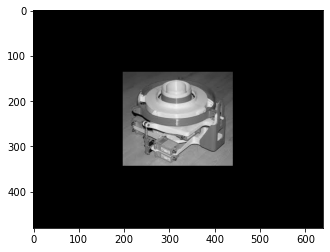

Wrong Prediction Number: 11
Image Number: 42
True Label: OK
Predict Label: failed


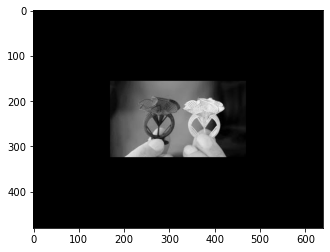

Wrong Prediction Number: 12
Image Number: 55
True Label: OK
Predict Label: failed


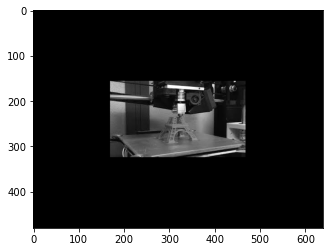

Wrong Prediction Number: 13
Image Number: 56
True Label: OK
Predict Label: failed


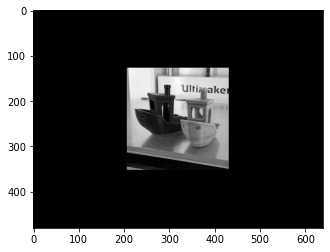

Wrong Prediction Number: 14
Image Number: 63
True Label: OK
Predict Label: failed


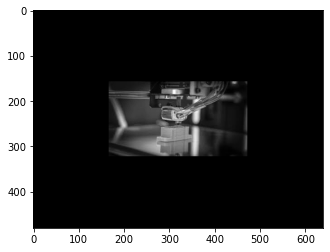

Wrong Prediction Number: 15
Image Number: 66
True Label: OK
Predict Label: failed


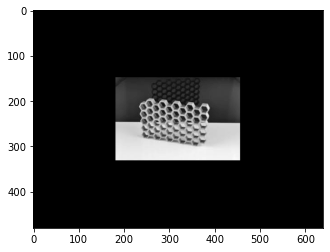

Wrong Prediction Number: 16
Image Number: 73
True Label: OK
Predict Label: failed


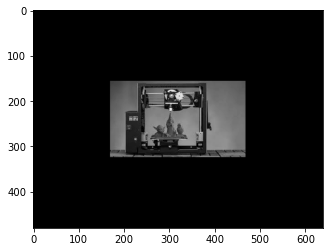

Wrong Prediction Number: 17
Image Number: 76
True Label: OK
Predict Label: failed


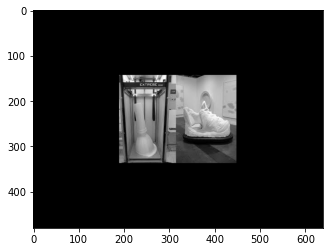

Wrong Prediction Number: 18
Image Number: 77
True Label: OK
Predict Label: failed


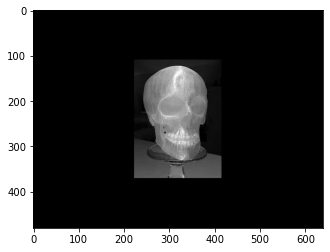

Wrong Prediction Number: 19
Image Number: 79
True Label: OK
Predict Label: failed


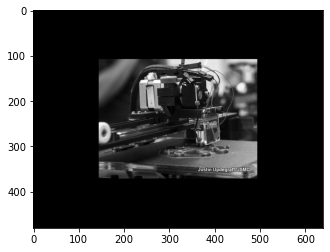

Wrong Prediction Number: 20
Image Number: 84
True Label: OK
Predict Label: failed


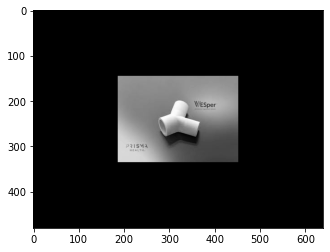

Wrong Prediction Number: 21
Image Number: 153
True Label: OK
Predict Label: failed


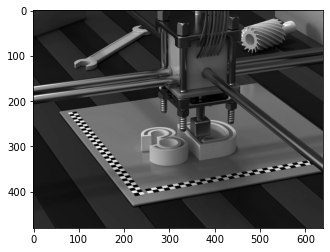

Wrong Prediction Number: 22
Image Number: 155
True Label: OK
Predict Label: failed


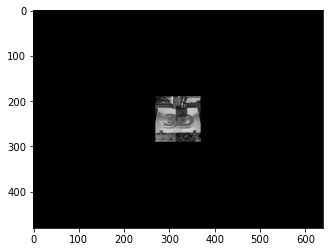

Wrong Prediction Number: 23
Image Number: 172
True Label: OK
Predict Label: failed


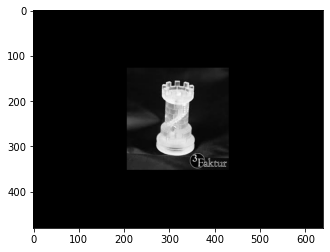

Wrong Prediction Number: 24
Image Number: 173
True Label: OK
Predict Label: failed


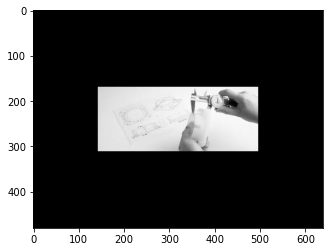

Wrong Prediction Number: 25
Image Number: 180
True Label: OK
Predict Label: failed


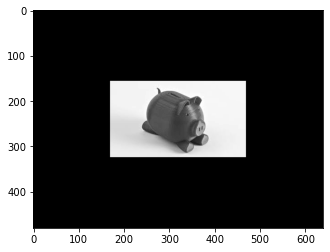

Wrong Prediction Number: 26
Image Number: 181
True Label: OK
Predict Label: failed


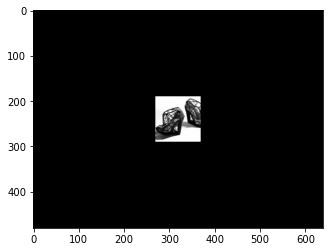

Wrong Prediction Number: 27
Image Number: 182
True Label: OK
Predict Label: failed


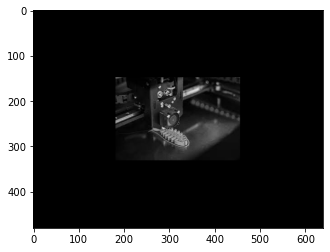

Wrong Prediction Number: 28
Image Number: 185
True Label: OK
Predict Label: failed


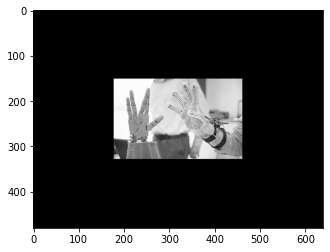

Wrong Prediction Number: 29
Image Number: 193
True Label: OK
Predict Label: failed


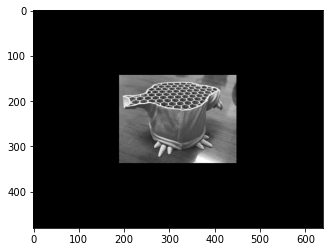

Wrong Prediction Number: 30
Image Number: 195
True Label: OK
Predict Label: failed


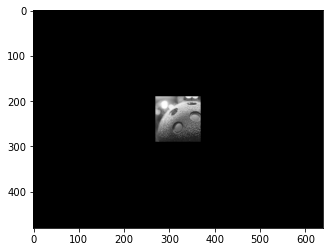

Wrong Prediction Number: 31
Image Number: 227
True Label: failed
Predict Label: OK


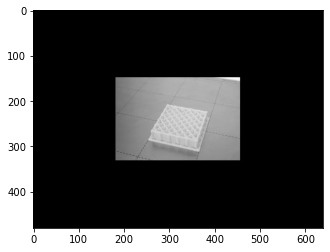

Wrong Prediction Number: 32
Image Number: 290
True Label: failed
Predict Label: OK


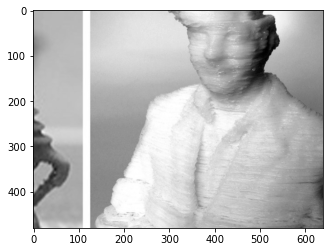

Wrong Prediction Number: 33
Image Number: 298
True Label: failed
Predict Label: OK


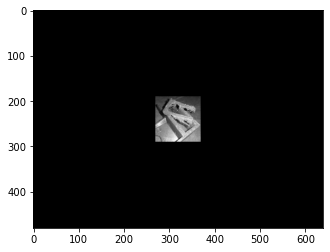

Wrong Prediction Number: 34
Image Number: 312
True Label: failed
Predict Label: OK


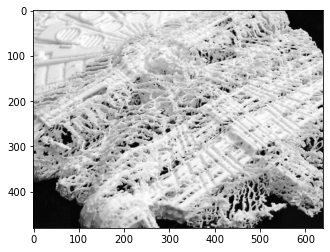

Wrong Prediction Number: 35
Image Number: 328
True Label: failed
Predict Label: OK


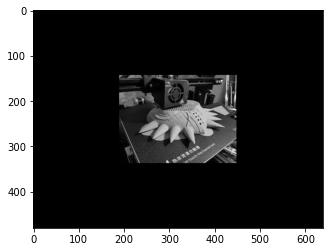

Wrong Prediction Number: 36
Image Number: 346
True Label: failed
Predict Label: OK


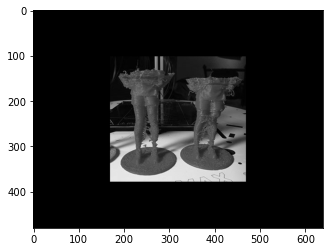

Wrong Prediction Number: 37
Image Number: 383
True Label: failed
Predict Label: OK


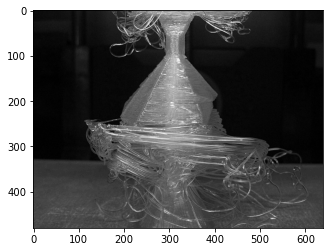

Wrong Prediction Number: 38
Image Number: 384
True Label: failed
Predict Label: OK


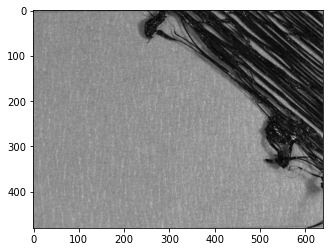

Wrong Prediction Number: 39
Image Number: 401
True Label: failed
Predict Label: OK


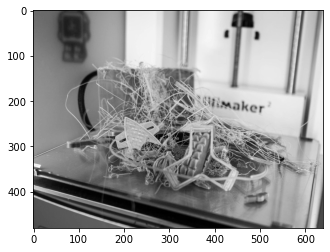

Wrong Prediction Number: 40
Image Number: 447
True Label: failed
Predict Label: OK


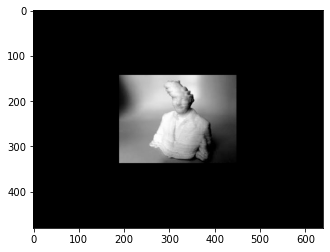

Wrong Prediction Number: 41
Image Number: 467
True Label: failed
Predict Label: OK


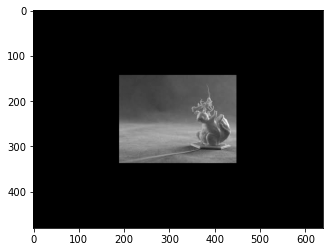

In [6]:
#identify incorrect predictions
count = 0
for i in range(len(X)):
    if y_pred[i] == y_true[i]:
        continue
    else:
        count = count + 1
        print("Wrong Prediction Number: " + str(count))
        print("Image Number: " + str(i))
        print("True Label: " + str(y_true[i]))
        print("Predict Label: " + str(y_pred[i]))
        #plt.imshow(X[i])
        plt.imshow(X[i], cmap='gray')
        plt.show()